## Stock price prediction using ARIMA model

In [143]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from pandas.plotting import lag_plot
from pandas import datetime
import pandas as pd
from statsmodels.tsa.arima_model import ARIMA

In [90]:
df = pd.read_csv("Stocks_dataset/Stocks/amzn.us.txt").fillna(0)
print(df.shape)

(5153, 7)


In [91]:
df.tail()

,Date,Open,High,Low,Close,Volume,OpenInt
5148,2017-11-06,1109.15,1125.41,1108.77,1120.66,3331738,0
5149,2017-11-07,1124.74,1130.60,1117.50,1123.17,2684443,0
5150,2017-11-08,1122.82,1135.54,1119.11,1132.88,2576010,0
5151,2017-11-09,1125.96,1129.62,1115.77,1129.13,3729978,0
5152,2017-11-10,1126.10,1131.75,1124.06,1125.35,2179181,0


Text(0.5, 1.0, 'Amazon Cummulative returns')

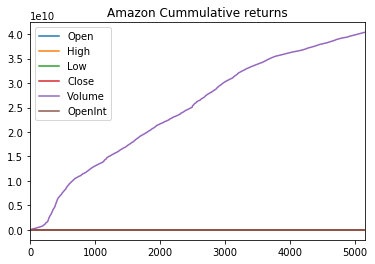

In [132]:
# cummulative returns of Amazon
cm = df.cumsum()
cm.plot()
plt.title("Amazon Cummulative returns")

In [92]:
cols_to_drop = ["Open","High","Low","Close","OpenInt"]

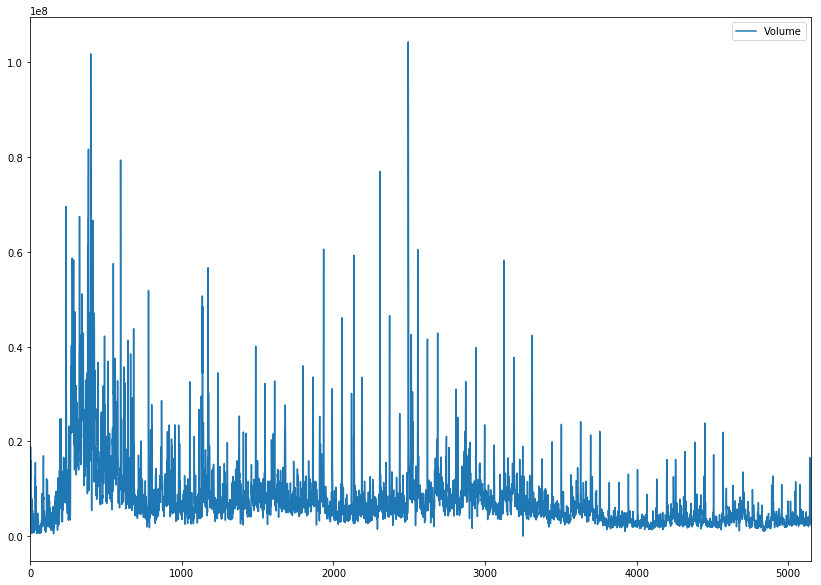

In [93]:
df1 = df.drop(cols_to_drop,axis=1)
df1.plot(figsize=(14,10))
plt.show()

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153 entries, 0 to 5152
Data columns (total 7 columns):
Date       5153 non-null object
Open       5153 non-null float64
High       5153 non-null float64
Low        5153 non-null float64
Close      5153 non-null float64
Volume     5153 non-null int64
OpenInt    5153 non-null int64
dtypes: float64(4), int64(2), object(1)
memory usage: 281.9+ KB


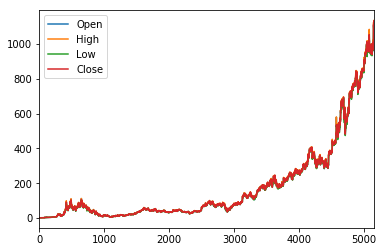

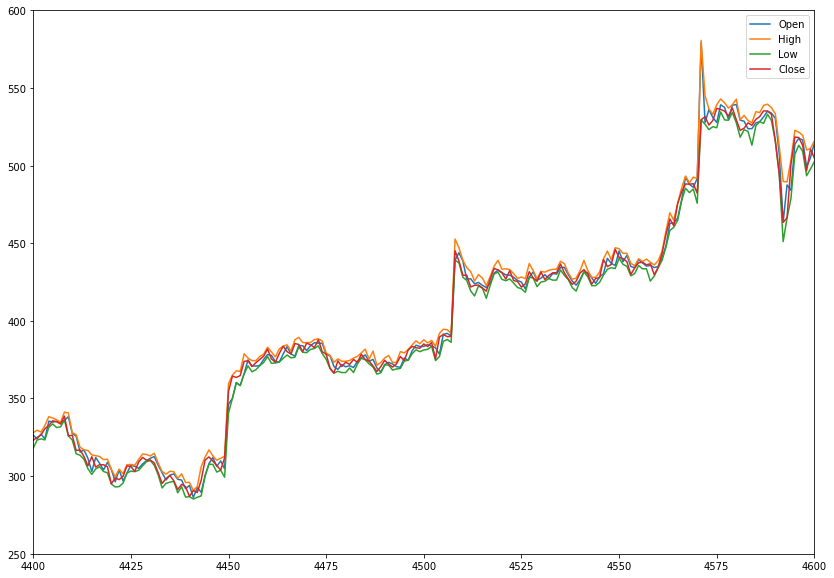

In [95]:
df2 = df.drop(["Volume","OpenInt"], axis=1)
df2.plot()
plt.show()

df2.plot(figsize=(14,10))
plt.xlim(4400,4600)
plt.ylim(250,600)
plt.show()

Text(0.5, 1.0, 'Amazon Autocorrelation plot')

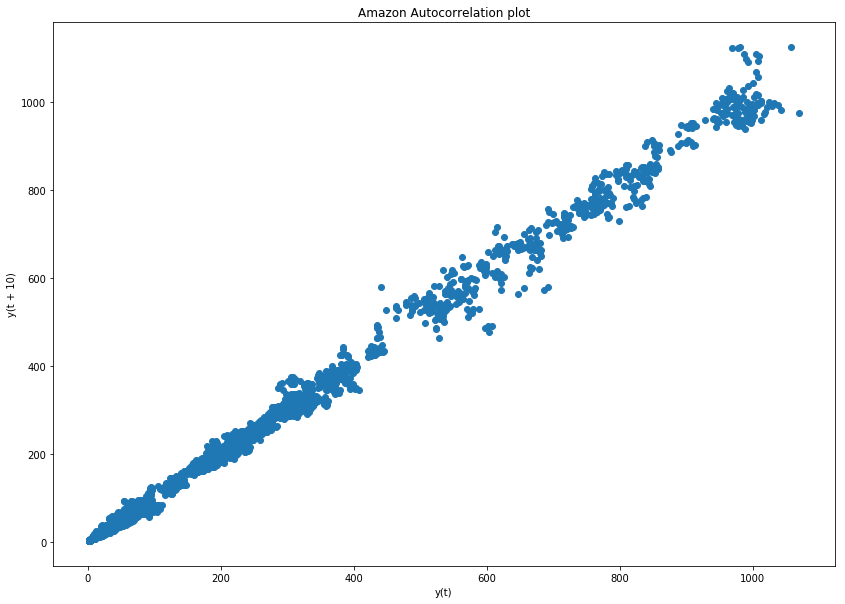

In [147]:
plt.figure(figsize=(14,10))
lag_plot(df["Open"],lag=10)
plt.title("Amazon Autocorrelation plot")

In [98]:
train_data , test_data = df[0:(int(len(df)*0.8))] , df[(int(len(df)*0.8)):]

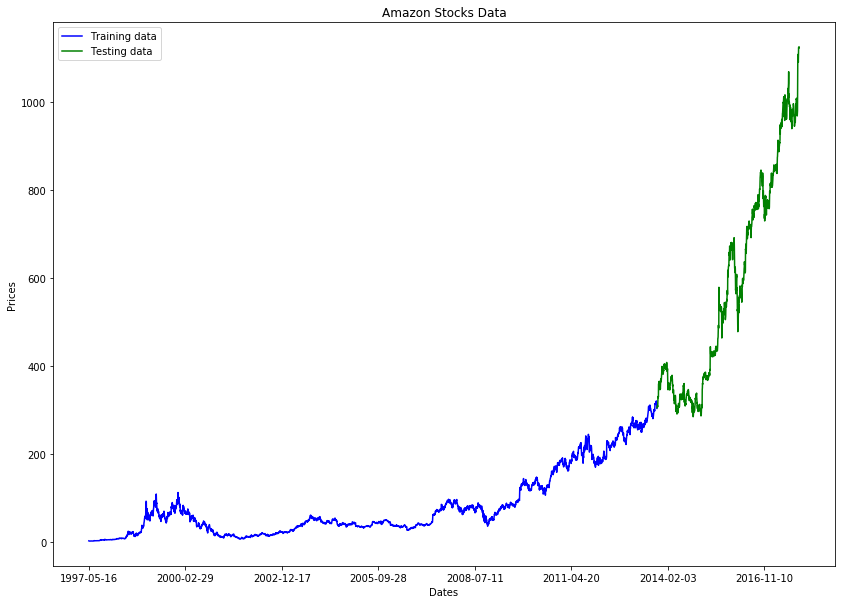

In [106]:
plt.figure(figsize = (14,10))
plt.title("Amazon Stocks Data")
plt.xlabel("Dates")
plt.ylabel("Prices")
plt.plot(train_data["Open"], "blue", label = "Training data")
plt.plot(test_data["Open"], "green", label = "Testing data")
plt.xticks(np.arange(0,5153, 700), df['Date'][0:5153:700])
plt.legend()

In [121]:
def smape(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [116]:
#mod = ARIMA(history, order = (5,0,1))

In [120]:
#mod.fit?

In [153]:
train_ar = train_data['Open'].values
test_ar = test_data['Open'].values
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
error2 = smape(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Symmetric mean absolute percentage error: 45.351


In [150]:
# output of the first five analysis is in the form shown below

<class 'list'>
(array([310.25338776]), array([2.70735492]), array([[304.94706963, 315.55970588]]))
(array([310.25338776]), array([2.70735492]), array([[304.94706963, 315.55970588]]))
(array([310.25338776]), array([2.70735492]), array([[304.94706963, 315.55970588]]))
(array([310.25338776]), array([2.70735492]), array([[304.94706963, 315.55970588]]))
(array([310.25338776]), array([2.70735492]), array([[304.94706963, 315.55970588]]))
Symmetric mean absolute percentage error: 52.380


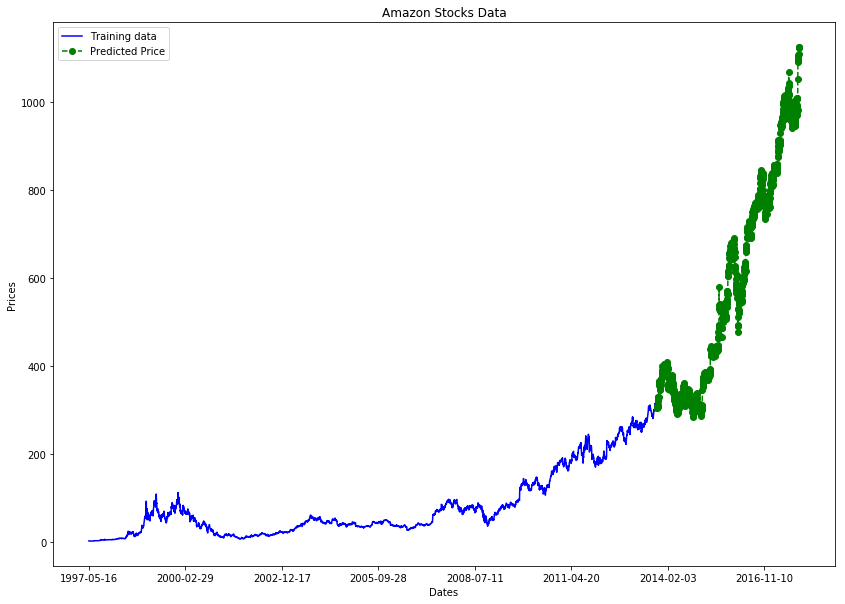

In [128]:
plt.figure(figsize = (14,10))
plt.title("Amazon Stocks Data")
plt.xlabel("Dates")
plt.ylabel("Prices")
plt.plot(train_data["Open"], "blue", label = "Training data")
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
#plt.plot(test_data["Open"], "red", label = "Testing data")
plt.xticks(np.arange(0,5153, 700), df['Date'][0:5153:700])
plt.legend()

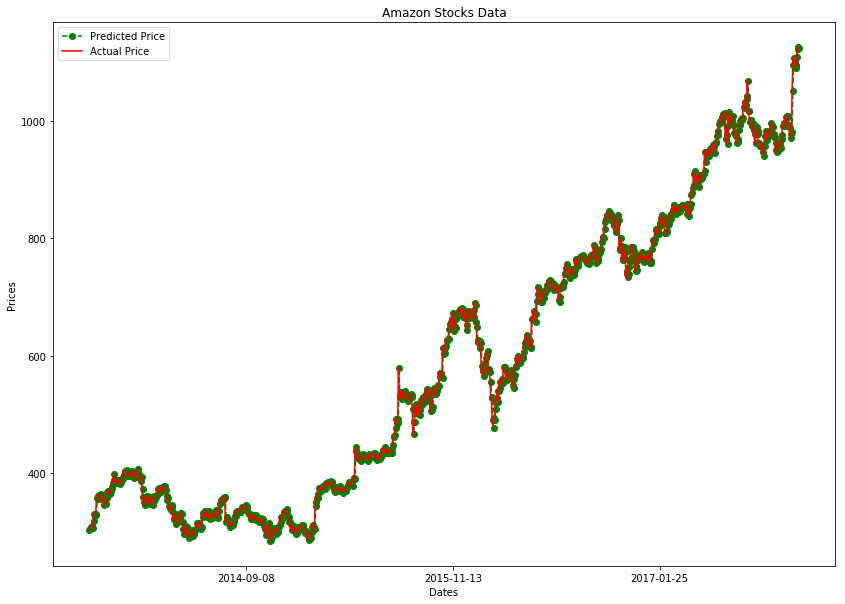

In [129]:
# comparison between the predicted price and the true price
plt.figure(figsize=(14,10))
plt.plot(test_data.index, predictions, color='green', marker='o', linestyle='dashed', 
         label='Predicted Price')
plt.plot(test_data.index, test_data['Open'], color='red', label='Actual Price')
plt.title('Amazon Stocks Data')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.xticks(np.arange(4350,5153, 300), df['Date'][4350:5153:300])
plt.legend()